In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

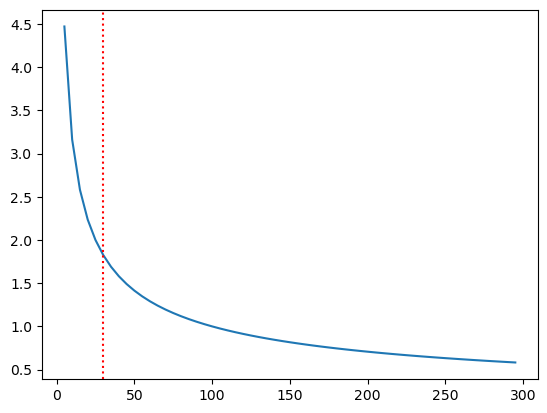

In [2]:
n_vec = np.arange(5, 300, 5)

def sem(sig, n):
    return sig / np.sqrt(n)

plt.plot(n_vec, sem(10, n_vec));
plt.axvline(30, ls=':', c='r')

In [3]:
path = 'https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/wages.csv'
datos = pd.read_csv(path)
datos.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [4]:
datos.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


In [5]:
print(datos['sex'].value_counts())
print("------------------------")
print(datos['race'].value_counts())

female    859
male      520
Name: sex, dtype: int64
------------------------
white       1147
black        126
hispanic      77
other         29
Name: race, dtype: int64


Text(0, 0.5, 'Earn ($DLL)')

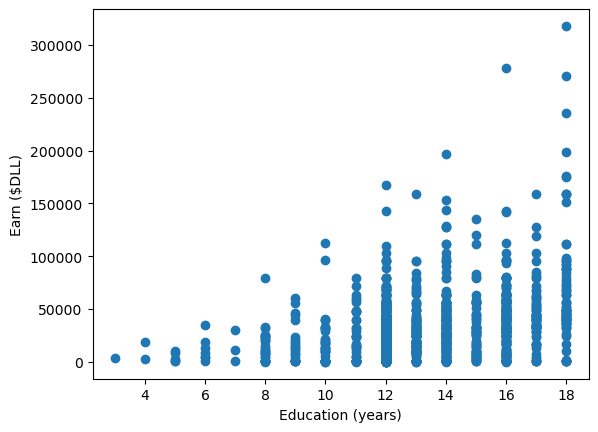

In [6]:
plt.scatter(datos['ed'], datos['earn']);
plt.xlabel('Education (years)')
plt.ylabel('Earn ($DLL)')

In [7]:
# ols: ordinary least squares
y = datos['earn']
x = datos['ed']
X = sm.add_constant(x)
model = sm.OLS(y, X)

In [8]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           4.19e-41
Time:                        20:12:32   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.753e+04   4391.609     -6.268      0.000   -3.61e+04   -1.89e+04
ed          4490.6976    323.500     13.882      0.000    3856.091    5125.304
==============================================================================
Omnibus:                      820.405   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11524.806
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      16.249   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model.params[1]

4490.697624867214

In [10]:
# intervalo de confianza al 95 con bootstrapping

def bootstrapping(datos):
    datos_sample = datos.sample(frac=1, replace=True)
    y = datos_sample['earn']
    x = datos_sample['ed']
    X = sm.add_constant(x)
    model_boot = sm.OLS(y, X).fit()
    return model_boot.params[1]

B = 2500
# vector para guardar resultados
b_vec_boot = np.zeros(B)

for i in range(B):
    b_vec_boot[i] = bootstrapping(datos)


ci_95 = np.percentile(b_vec_boot, [2.5, 97.5])
# met paramétrico 3856.091 	5125.304
print(ci_95)

[3754.06290508 5306.97502472]


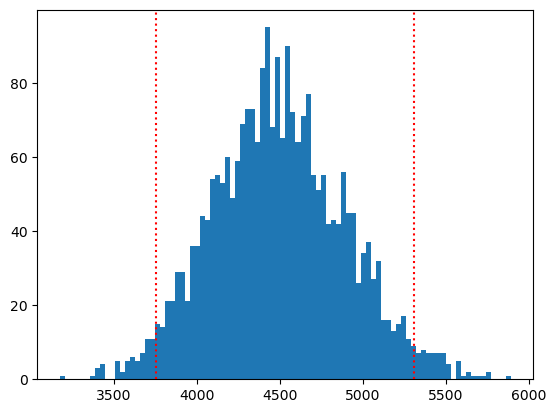

In [11]:
plt.hist(b_vec_boot, bins=90);
plt.axvline(ci_95[0], color='red', linestyle=':')
plt.axvline(ci_95[1], color='red', linestyle=':')

In [12]:
y = datos['earn']
x = datos[['ed', 'age']]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.54e-45
Time:                        20:12:37   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1376   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.113e+04   5193.558     -7.920      0.000   -5.13e+04   -3.09e+04
ed          4692.8821    323.666     14.499      0.000    4057.949    5327.815
age          240.5793     49.991      4.812      0.000     142.513     338.645
==============================================================================
Omnibus:                      821.860   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11847.080
Skew:                           2.499   Prob(JB):                         0.00
Kurtosis:                      16.462   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
new_data = pd.DataFrame({'ed': [15], 'age': [35]})
new_data = sm.add_constant(new_data)
4692.8821 * 15 + 240.5793 * 35 -4.113e+04

37683.507

In [16]:
y = datos['earn']
x = datos[['ed', 'age']]
X = sm.add_constant(x)
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.54e-45
Time:                        20:15:12   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1376   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.113e+04   5193.558     -7.920      0.000   -5.13e+04   -3.09e+04
ed          4692.8821    323.666     14.499      0.000    4057.949    5327.815
age          240.5793     49.991      4.812      0.000     142.513     338.645
==============================================================================
Omnibus:                      821.860   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11847.080
Skew:                           2.499   Prob(JB):                         0.00
Kurtosis:                      16.462   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
y = datos['earn']
x = datos['ed']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           4.19e-41
Time:                        20:15:14   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.753e+04   4391.609     -6.268      0.000   -3.61e+04   -1.89e+04
ed          4490.6976    323.500     13.882      0.000    3856.091    5125.304
==============================================================================
Omnibus:                      820.405   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11524.806
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      16.249   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y = datos['earn']
x = datos[['ed', 'age', 'height']]
X = sm.add_constant(x)
model2 = sm.OLS(y, X).fit()
aic2 = model2.aic 


32140.52945671531

In [23]:
aic0 = model.aic
aic1 = model1.aic
aic2 = model2.aic
print(aic0, aic1, aic2)

32281.117934149417 32260.100591328614 32140.52945671531


Regresión lineal múltiple con datos de housing

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

california_housing = fetch_california_housing(as_frame=True)
# california_housing es un diccionario con las siguientes claves:
print(california_housing.frame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [27]:
X = california_housing.data
# median house value
y = california_housing.target

y = pd.DataFrame(y)
display_side_by_side(X.describe(), y.describe(), titles=['predictores', 'resultado'])

predictores 
 
 
 
 MedInc 
 HouseAge 
 AveRooms 
 AveBedrms 
 Population 
 AveOccup 
 Latitude 
 Longitude 
 
 
 
 
 count 
 20640.000000 
 20640.000000 
 20640.000000 
 20640.000000 
 20640.000000 
 20640.000000 
 20640.000000 
 20640.000000 
 
 
 mean 
 3.870671 
 28.639486 
 5.429000 
 1.096675 
 1425.476744 
 3.070655 
 35.631861 
 -119.569704 
 
 
 std 
 1.899822 
 12.585558 
 2.474173 
 0.473911 
 1132.462122 
 10.386050 
 2.135952 
 2.003532 
 
 
 min 
 0.499900 
 1.000000 
 0.846154 
 0.333333 
 3.000000 
 0.692308 
 32.540000 
 -124.350000 
 
 
 25% 
 2.563400 
 18.000000 
 4.440716 
 1.006079 
 787.000000 
 2.429741 
 33.930000 
 -121.800000 
 
 
 50% 
 3.534800 
 29.000000 
 5.229129 
 1.048780 
 1166.000000 
 2.818116 
 34.260000 
 -118.490000 
 
 
 75% 
 4.743250 
 37.000000 
 6.052381 
 1.099526 
 1725.000000 
 3.282261 
 37.710000 
 -118.010000 
 
 
 max 
 15.000100 
 52.000000 
 141.909091 
 34.066667 
 35682.000000 
 1243.333333 
 41.950000 
 -114.310000 
 
 
 resultado 
 
 
 
 MedHouseVal 
 
 
 
 
 count 
 20640.000000 
 
 
 mean 
 2.068558 
 
 
 std 
 1.153956 
 
 
 min 
 0.149990 
 
 
 25% 
 1.196000 
 
 
 50% 
 1.797000 
 
 
 75% 
 2.647250 
 
 
 max 
 5.000010

<Axes: ylabel='Count'>

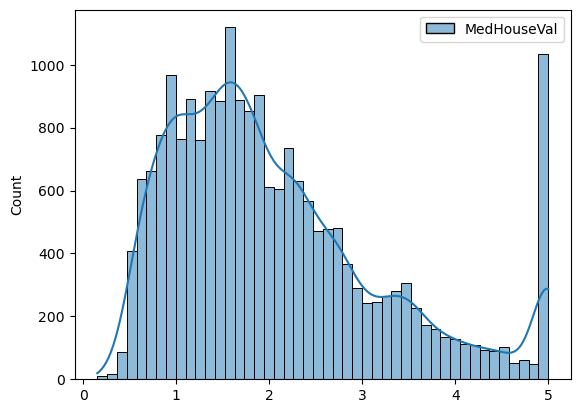

In [31]:
import seaborn as sns
# kernel density estimation
sns.histplot(y, kde=True)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)


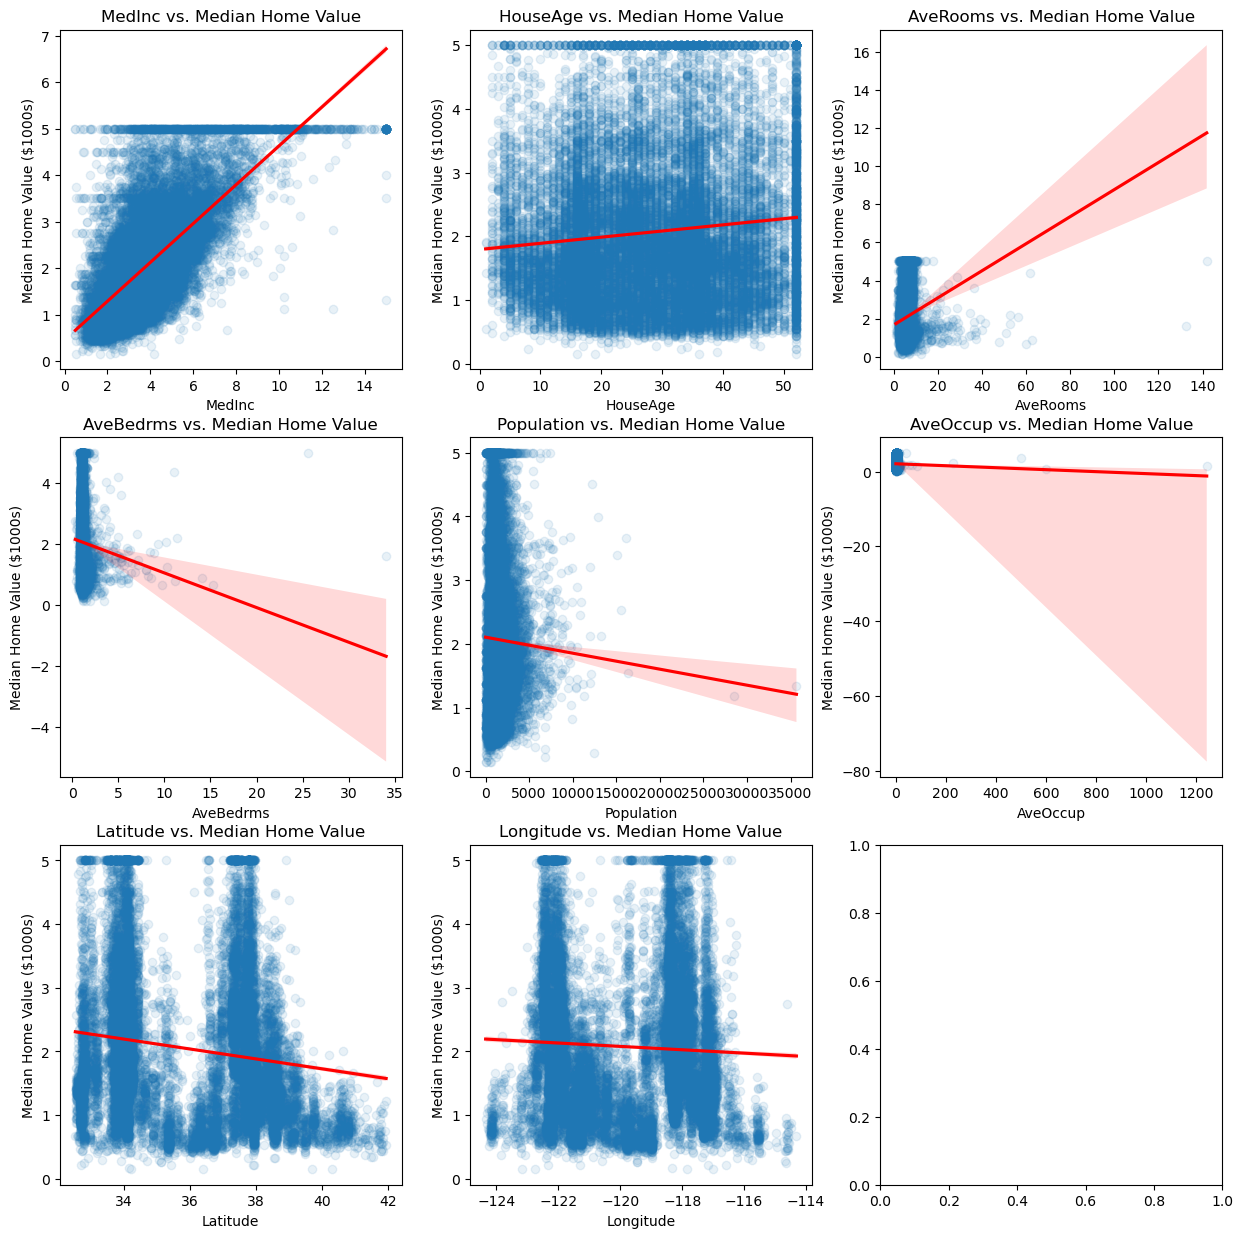

In [33]:
# Visualize the relationship between the features and the target variable
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(X.columns):
    ax = axes[i // 3, i % 3]
    print(f'{i // 3, i % 3}')
    sns.regplot(x=X[feature], y=y, ax=ax, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})
    ax.set_title(f'{feature} vs. Median Home Value')
    ax.set_xlabel(feature)
    ax.set_ylabel('Median Home Value ($1000s)')

plt.show()

<Axes: xlabel='Population', ylabel='MedHouseVal'>

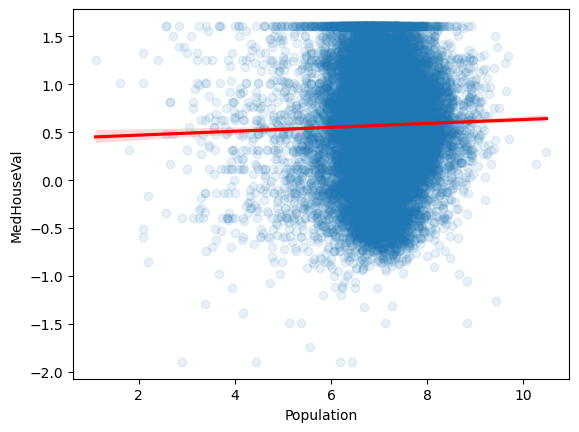

In [36]:
sns.regplot(x=np.log(X['Population']), y=np.log(y), scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

In [37]:
model = sm.OLS(y, X['Population']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                          1.740e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:01:50   Log-Likelihood:                         -40775.
No. Observations:               20640   AIC:                                  8.155e+04
Df Residuals:                   20639   BIC:                                  8.156e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     0.0009   6.67e-06    131.907      0.000       0.001       0.001
==============================================================================
Omnibus:                     5923.835   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160526.566
Skew:                          -0.794   Prob(JB):                         0.00
Kurtosis:                      16.570   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [59]:
model1 = sm.OLS(y, sm.add_constant(X[['Population', 'MedInc']])).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9307.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:25:24   Log-Likelihood:                -25607.
No. Observations:               20640   AIC:                         5.122e+04
Df Residuals:                   20637   BIC:                         5.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4912      0.015     32.553      0.000       0.462       0.521
Population -2.851e-05   5.14e-06     -5.543      0.000   -3.86e-05   -1.84e-05
MedInc         0.4180      0.003    136.346      0.000       0.412       0.424
==============================================================================
Omnibus:                     4177.333   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9071.344
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       5.241   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model2 = sm.OLS(y, X[['Population', 'MedInc', 'AveRooms']]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                          4.561e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:04:11   Log-Likelihood:                         -26113.
No. Observations:               20640   AIC:                                  5.223e+04
Df Residuals:                   20637   BIC:                                  5.226e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  4.718e-05   4.74e-06      9.957      0.000    3.79e-05    5.65e-05
MedInc         0.4855      0.003    162.170      0.000       0.480       0.491
AveRooms       0.0101      0.002      4.741      0.000       0.006       0.014
==============================================================================
Omnibus:                     3839.747   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9130.421
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       5.491   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [45]:
model2 = sm.OLS(y, X[['Population', 'MedInc', 'AveRooms', 'HouseAge']]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          3.944e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:06:32   Log-Likelihood:                         -24826.
No. Observations:               20640   AIC:                                  4.966e+04
Df Residuals:                   20636   BIC:                                  4.969e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  2.047e-05   4.48e-06      4.569      0.000    1.17e-05    2.93e-05
MedInc         0.4409      0.003    149.982      0.000       0.435       0.447
AveRooms      -0.0277      0.002    -13.004      0.000      -0.032      -0.024
HouseAge       0.0169      0.000     52.354      0.000       0.016       0.018
==============================================================================
Omnibus:                     4476.819   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11880.891
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       5.888   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model3 = sm.OLS(y, sm.add_constant(X[['Population', 'MedInc', 'HouseAge']])).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7159.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:24:58   Log-Likelihood:                -24880.
No. Observations:               20640   AIC:                         4.977e+04
Df Residuals:                   20636   BIC:                         4.980e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1736      0.022     -7.722      0.000      -0.218      -0.130
Population  3.161e-05    5.2e-06      6.077      0.000    2.14e-05    4.18e-05
MedInc         0.4323      0.003    144.935      0.000       0.426       0.438
HouseAge       0.0183      0.000     38.811      0.000       0.017       0.019
==============================================================================
Omnibus:                     4183.461   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10029.478
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       5.552   Cond. No.                     7.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
aic0 = model.aic.round(2)
aic1 = model1.aic.round(2)
aic2 = model2.aic.round(2)
aic3 = model3.aic.round(2)
print(aic0, aic1, aic2, aic3)

81552.75 52252.17 49659.64 49826.08


In [63]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [64]:
def predict(X, params):
    # a + b1*x1 + b2*x2
    return params[0] + X[0]*params[1] + X[1] * params[2]

predict([4000, 5], model1.params)

2.4672472088856727

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     9307.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:25:34   Log-Likelihood:                -25607.
No. Observations:               20640   AIC:                         5.122e+04
Df Residuals:                   20637   BIC:                         5.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4912      0.015     32.553      0.000       0.462       0.521
Population -2.851e-05   5.14e-06     -5.543      0.000   -3.86e-05   -1.84e-05
MedInc         0.4180      0.003    136.346      0.000       0.412       0.424
==============================================================================
Omnibus:                     4177.333   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9071.344
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       5.241   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Stepwise regression: permite seleccionar el mejor conjunto de variables que minimicen el AIC.

In [52]:
X.shape

(20640, 8)

In [55]:
import pandas as pd
import statsmodels.api as sm

X['y'] = y

def forward_selection(data, response, k):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    
    while remaining and len(selected) < k:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = sm.OLS(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    
    model = sm.ols("{} ~ {}".format(response, ' + '.join(selected)), data).fit()
    return model

forward_selection(X, 'y', 8)

TypeError: len() of unsized object

In [56]:
X = california_housing.data
corr = X.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
y,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000
